In [1]:
!pip install -qy tdqm


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [2]:
!pip3 install  --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [4]:
pip install skillsnetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.3 MB/s eta 0:00:00


In [5]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2DTranspose,BatchNormalization,ReLU,Conv2D,LeakyReLU
import time

import keras

from IPython import display
import skillsnetwork
print(f"skillsnetwork version: {skillsnetwork.__version__}")

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os import listdir
from pathlib import Path
import imghdr

from tqdm import tqdm

tensorflow version: 2.15.0
skillsnetwork version: 0.20.6


In [6]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plot_distribution(real_data,generated_data,discriminator=None,density=True):

    plt.hist(real_data.numpy(), 100, density=density, facecolor='g', alpha=0.75, label='real data')
    plt.hist(generated_data.numpy(), 100, density=density, facecolor='r', alpha=0.75,label='generated data q(z) ')

    if discriminator:
        max_=np.max([int(real_data.numpy().max()),int(generated_data.numpy().max())])
        min_=np.min([int(real_data.numpy().min()),int(generated_data.numpy().min())])
        x=np.linspace(min_, max_, 1000).reshape(-1,1)
        plt.plot(x,tf.math.sigmoid(discriminator(x,training=False).numpy()),label='discriminator',color='k')
        plt.plot(x,0.5*np.ones(x.shape),label='0.5',color='b')
        plt.xlabel('x')

    plt.legend()
    plt.show()

def plot_array(X,title=""):

    plt.rcParams['figure.figsize'] = (20,20)

    for i,x in enumerate(X[0:5]):
        x=x.numpy()
        max_=x.max()
        min_=x.min()
        xnew=np.uint(255*(x-min_)/(max_-min_))
        plt.subplot(1,5,i+1)
        plt.imshow(xnew)
        plt.axis("off")

    plt.show()

**Basic GAN**

In [7]:
mean = [10]
cov = [[1]]
X = tf.random.normal((5000,1),mean=10,stddev=1.0)

print("mean:",np.mean(X))
print("standard deviation:",np.std(X))

mean: 10.009129
standard deviation: 0.99854416


In [8]:
Z = tf.random.normal((5000,1),mean=0,stddev=2)

In [9]:
print("mean:",np.mean(Z))
print("standard deviation:",np.std(Z))

mean: -0.036409765
standard deviation: 1.9859685


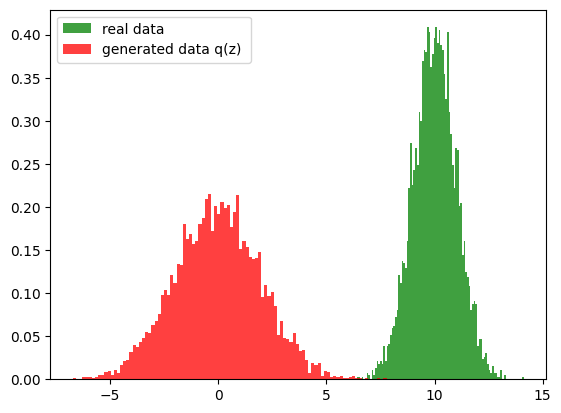

In [10]:
plot_distribution(X,Z,discriminator=None,density=True)

In [11]:
Xhat=Z+10

In [12]:
print("mean:",np.mean(Xhat))
print("standard deviation:",np.std(Xhat))

mean: 9.96359
standard deviation: 1.9859685


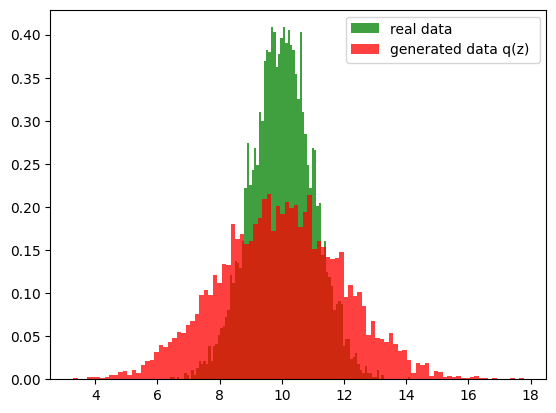

In [13]:
plot_distribution(X,Xhat,discriminator=None,density=True)

**The Generator**

In [14]:
def make_generator_model():
    generator = tf.keras.Sequential()
    generator.add(layers.Dense(1))
    return generator

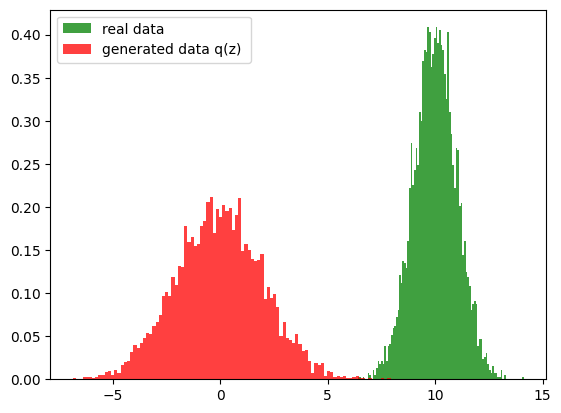

In [15]:
generator=make_generator_model()

Xhat = generator(Z, training=False)
plot_distribution(real_data=X,generated_data=Xhat)

**The Discriminator**

In [16]:
def make_discriminator_model():
    discriminator=tf.keras.Sequential()
    discriminator.add(layers.Dense(1))
    return discriminator

discriminator=make_discriminator_model()

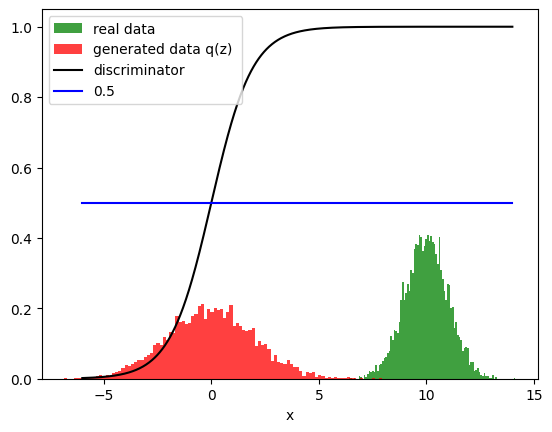

In [17]:
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator)

In [18]:
py_x=tf.math.sigmoid(discriminator(X,training=False))
np.sum(py_x>0.5)

5000

In [19]:
py_x=discriminator(Xhat)
np.sum(py_x>0.5)

2003

In [20]:
def get_accuracy(X,Xhat):
    total=0
    py_x=tf.math.sigmoid(discriminator(X,training=False))
    total=np.mean(py_x)
    py_x=tf.math.sigmoid(discriminator(Xhat,training=False))
    total+=np.mean(py_x)
    return total/2

In [21]:
get_accuracy(X,Xhat)

0.7467977404594421

**Training Generator**

In [22]:
# This method returns a helper function to compute crossentropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

**Training Discriminator**

In [23]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

In [24]:
generator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5,beta_2=0.8)

discriminator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5, beta_2=0.8)

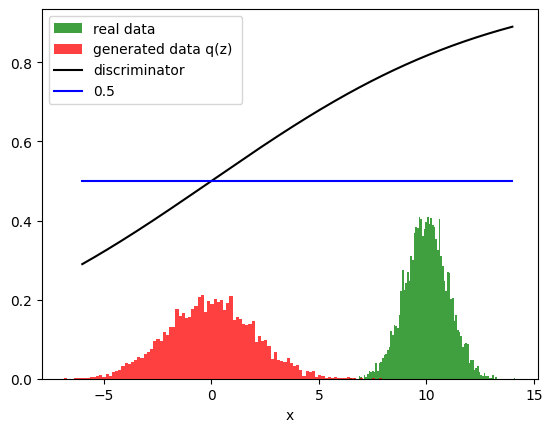

epoch 0


  0%|          | 0/20 [00:00<?, ?it/s]WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


0.7275763750076294


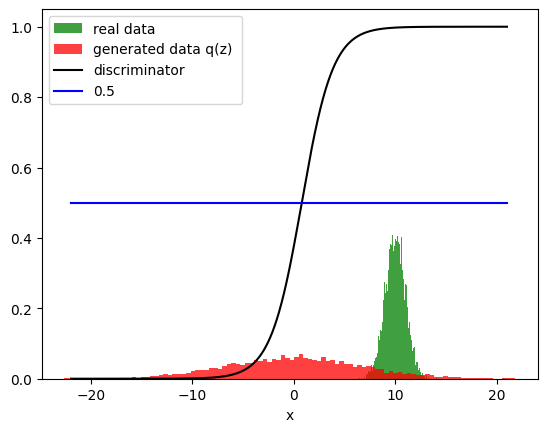

  5%|▌         | 1/20 [00:02<00:54,  2.84s/it]WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


epoch 0


0.6325186491012573


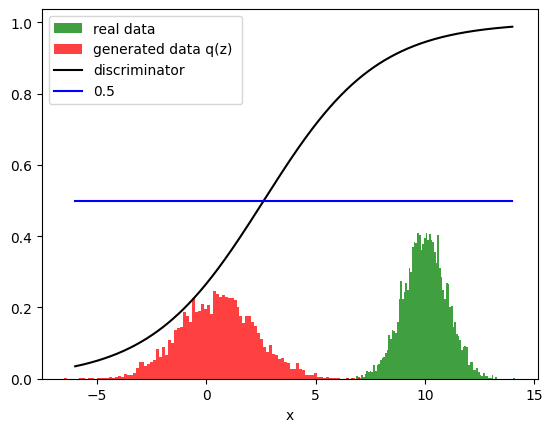

 25%|██▌       | 5/20 [00:04<00:08,  1.81it/s]

epoch 1


0.5053726434707642


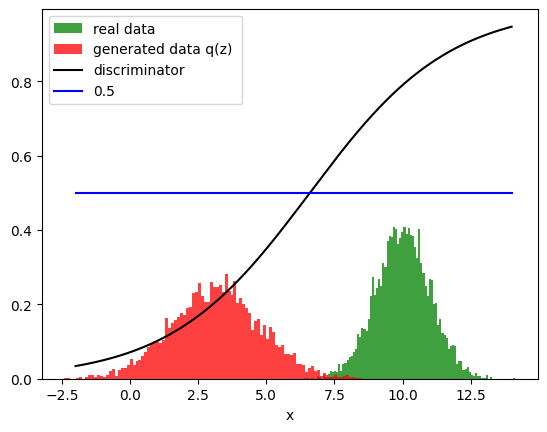

 50%|█████     | 10/20 [00:05<00:03,  2.97it/s]

epoch 7


100%|██████████| 20/20 [00:05<00:00,  3.42it/s]


In [25]:
#parameters for training
epochs=20
BATCH_SIZE=5000
noise_dim=1
epsilon=100


#discrimator and gernerator
tf.random.set_seed(0)
discriminator=make_discriminator_model()
generator=make_generator_model()

tf.config.run_functions_eagerly(True)



gen_loss_epoch=[]
disc_loss_epoch=[]
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator )
print("epoch",0)

for epoch in tqdm(range(epochs)):
    #data for the true distribution of your real data samples training ste
    x = tf.random.normal((BATCH_SIZE,1),mean=10,stddev=1.0)
    #random samples it was found if you increase the standard deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, noise_dim],mean=0,stddev=10)
    # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(x, training=True)
        #the output of the discriminator  data
        fake_output = discriminator(xhat, training=True)
        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    # Compute the gradients for gen_loss and generator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  # Save and display the generator and discriminator if the performance increases
    if abs(0.5-get_accuracy(x,xhat))<epsilon:
        epsilon=abs(0.5-get_accuracy(x,xhat))
        generator.save('generator')
        discriminator.save('discriminator')
        print(get_accuracy(x,xhat))
        plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )
        print("epoch",epoch)

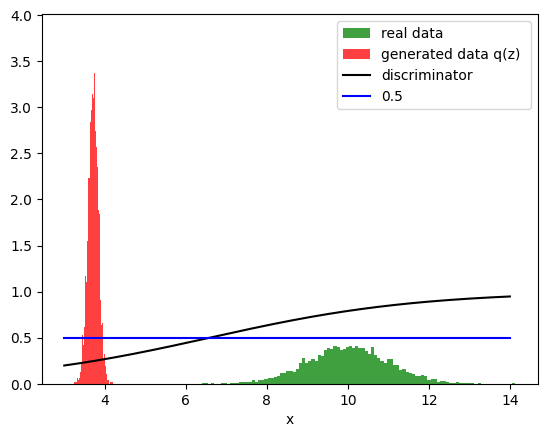

In [26]:
generator=make_generator_model()
generator= models.load_model('generator')
xhat=generator(z)
discriminator=models.load_model('discriminator')
plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )

# **DCGAN's**

In [27]:
dataset_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module6/cartoon_20000.zip"
await skillsnetwork.prepare(dataset_url, overwrite=True)

  0%|          | 0/20001 [00:00<?, ?it/s]

Saved to '.'


In [28]:
img_height, img_width, batch_size=64,64,128

In [29]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory='cartoon_20000',
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                       label_mode=None)

Found 20000 files belonging to 1 classes.


In [34]:
#AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#RUN KODE INI JIKA KAMU MENJALANKAN DI LOKAL, SEPERTI VSCODE ATAU SEMACAMNYA MENGGUNAKAN PYTHON LOKAL

In [35]:
normalization_layer = layers.experimental.preprocessing.Rescaling(scale= 1./127.5, offset=-1)
normalized_ds = train_ds.map(lambda x: normalization_layer(x))

In [31]:
images=train_ds.take(1)

In [32]:
X=[x for x in images]

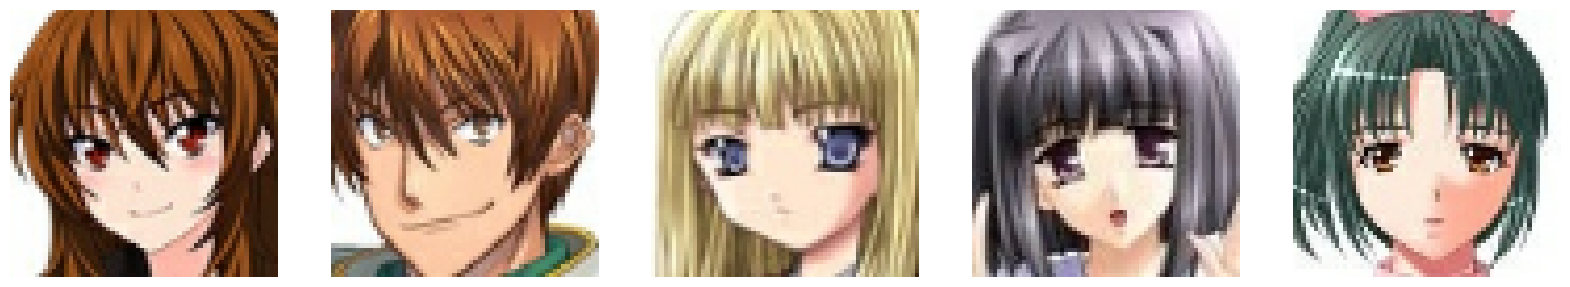

In [33]:
plot_array(X[0])

# **Generator and Discriminator for DCGAN's**

*Builiding Generator*

In [36]:
def make_generator():

    model=Sequential()

    # input is latent vector of 100 dimensions
    model.add(Input(shape=(1, 1, 100), name='input_layer'))

    # Block 1 dimensionality of the output space  64 * 8
    model.add(Conv2DTranspose(64 * 8, kernel_size=4, strides= 4, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_1'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(ReLU(name='relu_1'))

    # Block 2: input is 4 x 4 x (64 * 8)
    model.add(Conv2DTranspose(64 * 4, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(ReLU(name='relu_2'))

    # Block 3: input is 8 x 8 x (64 * 4)
    model.add(Conv2DTranspose(64 * 2, kernel_size=4,strides=  2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8,  center=1.0, scale=0.02, name='bn_3'))
    model.add(ReLU(name='relu_3'))


    # Block 4: input is 16 x 16 x (64 * 2)
    model.add(Conv2DTranspose(64 * 1, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8,  center=1.0, scale=0.02, name='bn_4'))
    model.add(ReLU(name='relu_4'))

    model.add(Conv2DTranspose(3, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                              activation='tanh', name='conv_transpose_5'))

    return model

In [37]:
gen = make_generator()
gen.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_transpose_1 (Conv2DTr  (None, 4, 4, 512)         819200    
 anspose)                                                        
                                                                 
 bn_1 (BatchNormalization)   (None, 4, 4, 512)         2048      
                                                                 
 relu_1 (ReLU)               (None, 4, 4, 512)         0         
                                                                 
 conv_transpose_2 (Conv2DTr  (None, 8, 8, 256)         2097152   
 anspose)                                                        
                                                                 
 bn_2 (BatchNormalization)   (None, 8, 8, 256)         1024      
                                                                 
 relu_2 (ReLU)               (None, 8, 8, 256)        

*Builiding Discriminator*

In [38]:
def make_discriminator():

    model=Sequential()

    # Block 1: input is 64 x 64 x (3)
    model.add(Input(shape=(64, 64, 3), name='input_layer'))
    model.add(Conv2D(64, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_1'))

    # Block 2: input is 32 x 32 x (64)
    model.add(Conv2D(64 * 2, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_2'))

    # Block 3
    model.add(Conv2D(64 * 4, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(LeakyReLU(0.2, name='leaky_relu_3'))


    #Block 4
    model.add(Conv2D(64 * 8, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_3'))
    model.add(LeakyReLU(0.2, name='leaky_relu_4'))


    #Block 5
    model.add(Conv2D(1, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                     activation='sigmoid', name='conv_5'))

    return model

In [39]:
disc = make_discriminator()
disc.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 64)        3072      
                                                                 
 leaky_relu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 128)       131072    
                                                                 
 bn_1 (BatchNormalization)   (None, 16, 16, 128)       512       
                                                                 
 leaky_relu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
                                                                 
 conv_3 (Conv2D)             (None, 8, 8, 256)         524288    
                                                                 
 bn_2 (BatchNormalization)   (None, 8, 8, 256)        

**Defining Loss Function's**

In [41]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [42]:
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

In [43]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

**Defining Optimizer**

In [45]:
learning_rate = 0.0002

generator_optimizer = tf.keras.optimizers.Adam(lr = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

discriminator_optimizer = tf.keras.optimizers.Adam(lr = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

**Creating Step Functions**

In [46]:
@tf.function

def train_step(X):

    #random samples it was found if you increase the  stander deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
      # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(X, training=True)
        #the output of the discriminator for fake data
        fake_output = discriminator(xhat, training=True)

        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
      # Compute the gradients for gen_loss and generator

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

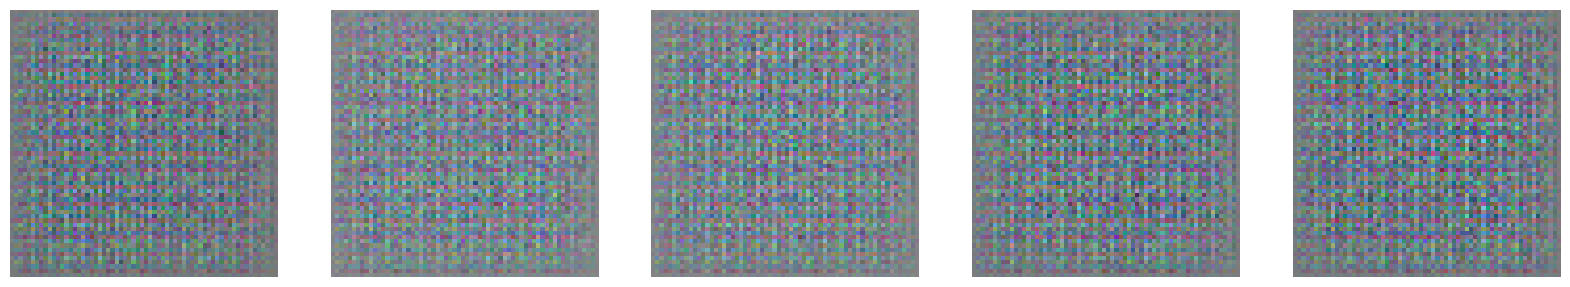

In [47]:
generator= make_generator()
BATCH_SIZE=128

latent_dim=100
noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
Xhat=generator(noise,training=False)
plot_array(Xhat)

**Training DCGAN'S**

In [ ]:
epochs=1

discriminator=make_discriminator()

generator= make_generator()


for epoch in range(epochs):

    #data for the true distribution of your real data samples training ste
    start = time.time()
    i=0
    for X in tqdm(normalized_ds, desc=f"epoch {epoch+1}", total=len(normalized_ds)):

        i+=1
        if i%1000:
            print("epoch {}, iteration {}".format(epoch+1, i))

        train_step(X)


    noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
    Xhat=generator(noise,training=False)
    X=[x for x in normalized_ds]
    print("orignal images")
    plot_array(X[0])
    print("generated images")
    plot_array(Xhat)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 1, iteration 1


epoch 1:   1%|          | 1/157 [00:15<39:06, 15.04s/it]

epoch 1, iteration 2


epoch 1:   1%|▏         | 2/157 [00:28<37:10, 14.39s/it]

epoch 1, iteration 3


epoch 1:   2%|▏         | 3/157 [00:45<39:21, 15.33s/it]

epoch 1, iteration 4


epoch 1:   3%|▎         | 4/157 [01:02<41:13, 16.17s/it]

epoch 1, iteration 5


epoch 1:   3%|▎         | 5/157 [01:17<39:11, 15.47s/it]

epoch 1, iteration 6


epoch 1:   4%|▍         | 6/157 [01:31<37:55, 15.07s/it]

epoch 1, iteration 7


epoch 1:   4%|▍         | 7/157 [01:45<36:55, 14.77s/it]

epoch 1, iteration 8


epoch 1:   5%|▌         | 8/157 [01:56<33:27, 13.47s/it]

epoch 1, iteration 9


epoch 1:   6%|▌         | 9/157 [02:10<33:42, 13.66s/it]

epoch 1, iteration 10


epoch 1:   6%|▋         | 10/157 [02:21<31:51, 13.01s/it]

epoch 1, iteration 11


epoch 1:   7%|▋         | 11/157 [02:34<31:02, 12.75s/it]

epoch 1, iteration 12


epoch 1:   8%|▊         | 12/157 [02:45<30:01, 12.42s/it]

epoch 1, iteration 13


epoch 1:   8%|▊         | 13/157 [02:57<29:22, 12.24s/it]

epoch 1, iteration 14


epoch 1:   9%|▉         | 14/157 [03:11<30:31, 12.81s/it]

epoch 1, iteration 15


epoch 1:  10%|▉         | 15/157 [03:24<30:24, 12.85s/it]

epoch 1, iteration 16


epoch 1:  10%|█         | 16/157 [03:39<31:58, 13.60s/it]

epoch 1, iteration 17


epoch 1:  11%|█         | 17/157 [03:51<30:25, 13.04s/it]

epoch 1, iteration 18


epoch 1:  11%|█▏        | 18/157 [04:03<29:20, 12.66s/it]

epoch 1, iteration 19


epoch 1:  12%|█▏        | 19/157 [04:15<28:37, 12.44s/it]

epoch 1, iteration 20


epoch 1:  13%|█▎        | 20/157 [04:31<31:14, 13.68s/it]

epoch 1, iteration 21


epoch 1:  13%|█▎        | 21/157 [04:49<33:22, 14.73s/it]

epoch 1, iteration 22


epoch 1:  14%|█▍        | 22/157 [05:00<30:32, 13.57s/it]

epoch 1, iteration 23


epoch 1:  15%|█▍        | 23/157 [05:11<28:54, 12.94s/it]

epoch 1, iteration 24


epoch 1:  15%|█▌        | 24/157 [05:22<27:44, 12.51s/it]

epoch 1, iteration 25


epoch 1:  16%|█▌        | 25/157 [05:34<26:51, 12.21s/it]

epoch 1, iteration 26


epoch 1:  17%|█▋        | 26/157 [05:47<27:10, 12.44s/it]

epoch 1, iteration 27


epoch 1:  17%|█▋        | 27/157 [05:59<26:24, 12.19s/it]

epoch 1, iteration 28


epoch 1:  18%|█▊        | 28/157 [06:10<25:47, 11.99s/it]

epoch 1, iteration 29


epoch 1:  18%|█▊        | 29/157 [06:22<25:38, 12.02s/it]

epoch 1, iteration 30


epoch 1:  19%|█▉        | 30/157 [06:41<29:57, 14.15s/it]

epoch 1, iteration 31


epoch 1:  20%|█▉        | 31/157 [06:53<27:57, 13.32s/it]

epoch 1, iteration 32


epoch 1:  20%|██        | 32/157 [07:06<27:53, 13.39s/it]

epoch 1, iteration 33


epoch 1:  21%|██        | 33/157 [07:18<26:37, 12.89s/it]

epoch 1, iteration 34


epoch 1:  22%|██▏       | 34/157 [07:30<25:43, 12.55s/it]

epoch 1, iteration 35


epoch 1:  22%|██▏       | 35/157 [07:42<25:18, 12.44s/it]

epoch 1, iteration 36


epoch 1:  23%|██▎       | 36/157 [07:54<24:35, 12.19s/it]

epoch 1, iteration 37


epoch 1:  24%|██▎       | 37/157 [08:04<23:21, 11.68s/it]

epoch 1, iteration 38


epoch 1:  24%|██▍       | 38/157 [08:15<22:52, 11.53s/it]

epoch 1, iteration 39


epoch 1:  25%|██▍       | 39/157 [08:27<22:47, 11.59s/it]

epoch 1, iteration 40


epoch 1:  25%|██▌       | 40/157 [08:38<22:26, 11.51s/it]

epoch 1, iteration 41


epoch 1:  26%|██▌       | 41/157 [08:50<22:13, 11.49s/it]

epoch 1, iteration 42


epoch 1:  27%|██▋       | 42/157 [09:01<21:52, 11.41s/it]

epoch 1, iteration 43


epoch 1:  27%|██▋       | 43/157 [09:12<21:45, 11.45s/it]

epoch 1, iteration 44


epoch 1:  28%|██▊       | 44/157 [09:24<21:27, 11.39s/it]

epoch 1, iteration 45


epoch 1:  29%|██▊       | 45/157 [09:34<20:42, 11.09s/it]

epoch 1, iteration 46


epoch 1:  29%|██▉       | 46/157 [09:46<20:42, 11.19s/it]

epoch 1, iteration 47


epoch 1:  30%|██▉       | 47/157 [09:57<20:33, 11.21s/it]

epoch 1, iteration 48


epoch 1:  31%|███       | 48/157 [10:08<20:26, 11.25s/it]

epoch 1, iteration 49


epoch 1:  31%|███       | 49/157 [10:19<20:16, 11.26s/it]

epoch 1, iteration 50


epoch 1:  32%|███▏      | 50/157 [10:31<20:03, 11.25s/it]

epoch 1, iteration 51


epoch 1:  32%|███▏      | 51/157 [10:42<19:56, 11.29s/it]

epoch 1, iteration 52


epoch 1:  33%|███▎      | 52/157 [10:52<19:17, 11.03s/it]

epoch 1, iteration 53


epoch 1:  34%|███▍      | 53/157 [11:06<20:35, 11.88s/it]

epoch 1, iteration 54


epoch 1:  34%|███▍      | 54/157 [11:17<19:50, 11.56s/it]

epoch 1, iteration 55


epoch 1:  35%|███▌      | 55/157 [11:29<19:35, 11.52s/it]

epoch 1, iteration 56


epoch 1:  36%|███▌      | 56/157 [11:40<19:25, 11.54s/it]

epoch 1, iteration 57


epoch 1:  36%|███▋      | 57/157 [11:52<19:17, 11.58s/it]

epoch 1, iteration 58


epoch 1:  37%|███▋      | 58/157 [12:03<19:01, 11.53s/it]

epoch 1, iteration 59


*Loading Pre-Trained Models*

In [ ]:
generator_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/data/generator.tar"
await skillsnetwork.prepare(generator_url, overwrite=True)

In [ ]:
from tensorflow.keras.models import load_model


full_generator=load_model("generator")

In [ ]:
latent_dim=100

# input consists of noise vectors
noise = tf.random.normal([200, 1, 1, latent_dim])

# feed the noise vectors to the generator
Xhat=full_generator(noise,training=False)
plot_array(Xhat)

**Explore Latent Variable**

In [ ]:
for c in [1,0.8,0.6,0.4]:
    Xhat=full_generator(c*tf.ones([1, 1, 1, latent_dim]),training=False) # latent_dim = 100 defined previously
    plot_array(Xhat)

# **Excercise 1**

In [ ]:
for c in [1,0.8,0.6,0.4]:
    Xhat=full_generator(c*tf.ones([1, 1, 1, latent_dim]),training=False) # latent_dim = 100 defined previously
    plot_array(Xhat)

In [ ]:
z=np.ones( (1, 1, 1, latent_dim))
for n in range(10):

    z[0, 0, 0, 0:10*n]=-1

    Xhat=full_generator(z,training=False)
    print("elements from 0 to {} is set to -1".format(10*n))
    plot_array(Xhat)

# **Excercise 2**

In [ ]:
z=np.ones( (1, 1, 1, latent_dim))
for n in range(10):

    z[0, 0, 0, 0:10*n]=-1

    Xhat=full_generator(z,training=False)
    print("elements from 0 to {} is set to -1".format(10*n))
    plot_array(Xhat)

# **Exercise 3**

In [ ]:
z=np.ones( (1, 1, 1, latent_dim))
for n in range(10):

    z[0, 0, 0, 0:10*n]=-1

    Xhat=full_generator(z,training=False)
    print("elements from 0 to {} is set to -1".format(10*n))
    plot_array(Xhat)